In [1]:
import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import konfuzio_sdk
from konfuzio_sdk.data import Project
from konfuzio_sdk.tokenizer.regex import WhitespaceTokenizer
from tests.variables import OFFLINE_PROJECT

/home/sam-konf/miniconda3/envs/konfuzio/lib/python3.8/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn(


In [2]:
# !pip show konfuzio_sdk
#!conda init bash
#!conda activate konfuzio
# !konfuzio_sdk init

In [28]:
import transformers

In [4]:
# transformers.__version__

In [4]:
from transformers import AutoProcessor
# from datasets.features import ClassLabel
# from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D
# from datasets import load_metric
import torch
from transformers import LayoutLMv3ForTokenClassification
from transformers.data.data_collator import default_data_collator
from transformers import AutoModelForTokenClassification
from PIL import Image, ImageDraw, ImageFont

/home/sam-konf/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
project = Project(id_=None, project_folder=OFFLINE_PROJECT)
# project = Project(id_=1435)


In [7]:
len(project._documents)

29

In [3]:
documents = project.documents #_by_id(44859) #(141131) #(44823)

# document.get_text_in_bio_scheme()
# document.get_bbox()

In [5]:
#txt_info = {'bio_scheme'}
# for i, e in enumerate(document.get_text_in_bio_scheme()):
#     if ' ' in e[0]:
#         print(i, e)
d = documents[1]
# d.get_bbox()
#dir(d)
d.get_images()
d.image_paths

['/home/sam-konf/Konfuzio/konfuzio-sdk/tests/example_project_data/documents/44834/page_1.png']

In [7]:
d.text.count('\f')

0

In [8]:
anns = d.annotations(fill=True, use_correct=False)

In [9]:
len(anns)

33

In [10]:
document.image_paths

NameError: name 'document' is not defined

In [11]:
page = d.pages[0]

In [12]:
page.image

'/page/show-image/1938/'

In [66]:
dir(page)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'document',
 'end_offset',
 'id_',
 'id_iter',
 'id_local',
 'image',
 'lose_weight',
 'number',
 'original_size',
 'session',
 'size',
 'start_offset']

In [18]:
anns[1].spans[0].bbox()

Span (385, 390)

In [63]:
# dir(anns[1])

In [52]:
anns[1].label

Label: Personalausweis

In [53]:
anns[1].offset_string

['00103']

In [54]:
d.image_paths[0]

'/home/sam-konf/Konfuzio/konfuzio-sdk/tests/example_project_data/documents/44834/page_1.png'

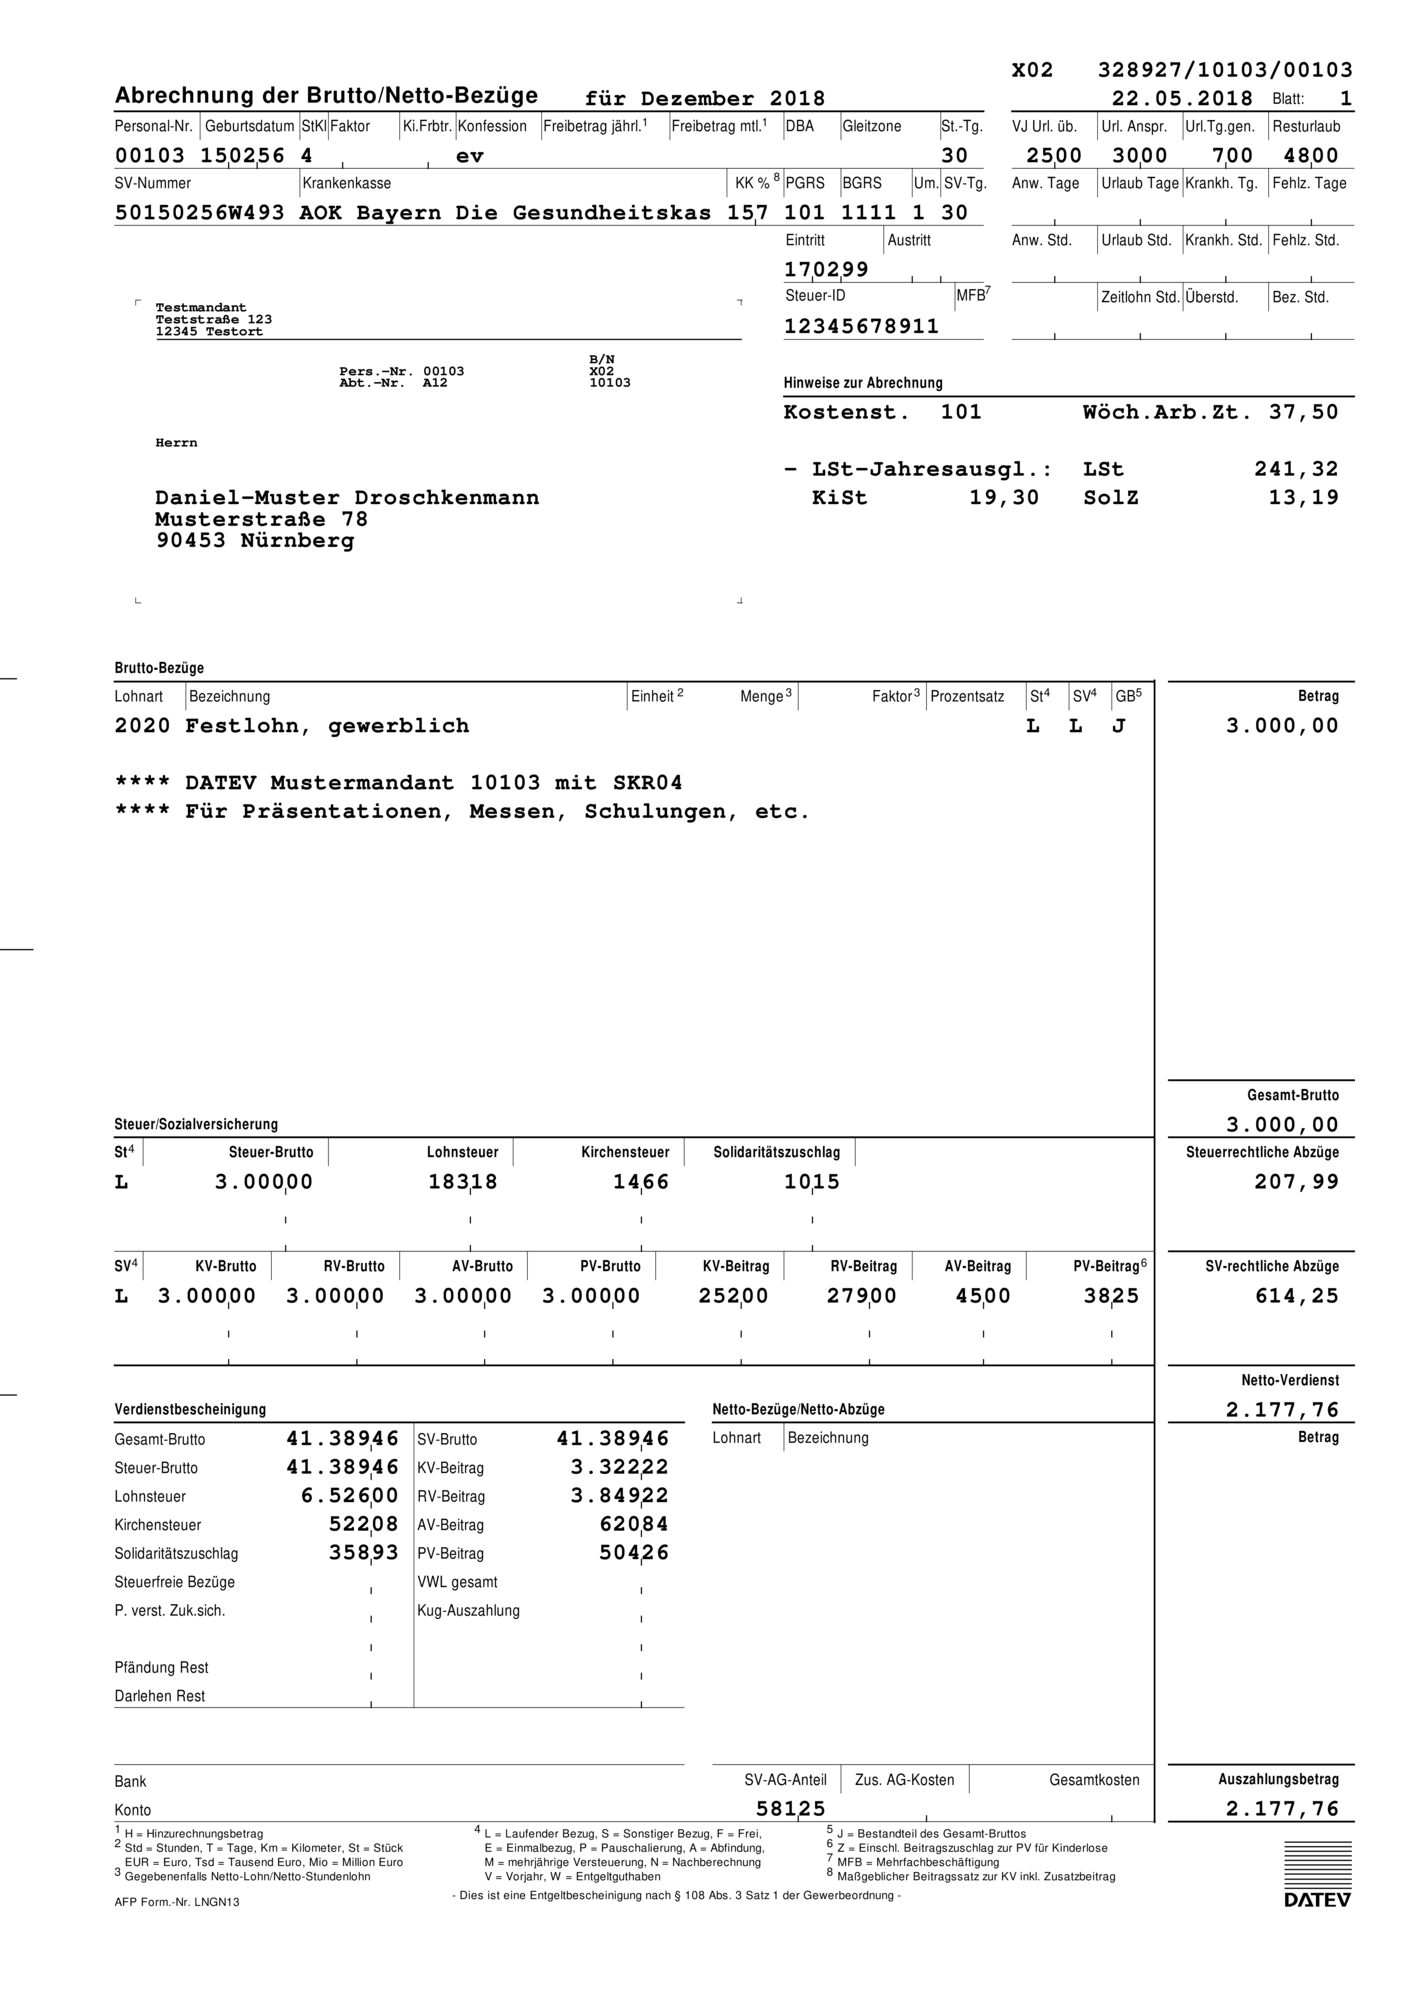

In [55]:
Image.open(d.image_paths[0])

In [56]:

def get_txt_bbox_info(doc):
    try:
        bio_scheme = doc.get_text_in_bio_scheme()
    except ValueError as e:
        print(e)
        return
    bbox = doc.get_bbox()
    print('l bbox', len(bbox))
    text = doc.text
    while "  " in text:
        text = text.replace('  ', ' ')
    print('l text', len(text), len(text.replace(' ', '').replace('\n', '')))
    bio_txt = ' '.join([e[0] for e in bio_scheme if e[1]=='O'])
    print('l bio', len(bio_txt), len(bio_txt.replace(' ', '').replace('\n', '')))
    
    bbox_txt = ''.join([bbox[k]['text'] for k in sorted(bbox.keys(), key=lambda x: int(x))])
    #bbox_txt.replace(' ', '').replace('\n', '')
    print('bbox,text', len(bbox_txt))
    
    try:
        doc.get_images()

        img = Image.open(d.image_paths[0])
    except PermissionError:
        print(doc)
    
#     try:
#         assert len(text) <= len(bio_txt)
#     except AssertionError:
#         print
    #print()
    
    # ...
    
    
    

In [57]:
data = []
for i, doc in enumerate(documents):
    print(i)
    get_txt_bbox_info(doc)
    

0
l bbox 2249
l text 2594 2230
l bio 2602 2222
bbox,text 2249
1
l bbox 2248
l text 2582 2229
l bio 2590 2223
bbox,text 2248
2
l bbox 2307
l text 2657 2288
l bio 2658 2281
bbox,text 2307
3
l bbox 2146
l text 2467 2128
l bio 2476 2122
bbox,text 2146
4
l bbox 2363
l text 2716 2344
l bio 2727 2337
bbox,text 2363
5
l bbox 2304
l text 2659 2285
l bio 2664 2277
bbox,text 2304
6
l bbox 2207
l text 2534 2188
l bio 2549 2182
bbox,text 2207
7
l bbox 2339
l text 2692 2321
l bio 2706 2313
bbox,text 2339
8
l bbox 2335
l text 2682 2317
l bio 2700 2310
bbox,text 2335
9
l bbox 2426
l text 2779 2407
l bio 2789 2402
bbox,text 2426
10


[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to

l bbox 2259
l text 2606 2241
l bio 2615 2235
bbox,text 2259
11
l bbox 2245
l text 2583 2226
l bio 2582 2218
bbox,text 2245
12
l bbox 2271
l text 2618 2252
l bio 2619 2244
bbox,text 2271
13
l bbox 2368
l text 2724 2349
l bio 2734 2343
bbox,text 2368
14
l bbox 2293
l text 2644 2274
l bio 2646 2267
bbox,text 2293
15
l bbox 2228
l text 2575 2210
l bio 2580 2204
bbox,text 2228
16
l bbox 2366
l text 2714 2347
l bio 2726 2341
bbox,text 2366
17
l bbox 2270
l text 2617 2251
l bio 2621 2245
bbox,text 2270
18
l bbox 2288
l text 2644 2269
l bio 2648 2262
bbox,text 2288
19
l bbox 2253
l text 2597 2234
l bio 2604 2230
bbox,text 2253
20
l bbox 2269
l text 2619 2250
l bio 2622 2243
bbox,text 2269
21


[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to

l bbox 2230
l text 2571 2211
l bio 2572 2205
bbox,text 2230
22
l bbox 2250
l text 2603 2232
l bio 2608 2227
bbox,text 2250
23
l bbox 2276
l text 2627 2258
l bio 2633 2252
bbox,text 2276
24
l bbox 2237
l text 2579 2219
l bio 2586 2214
bbox,text 2237
25
Document Document 2022-02-13 16:19:30.684745 (44864) without Category must not have Annotations


[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
len(documents)

29

In [21]:
document = d
len(document.text.replace(' ', '').replace('\n', ''))
#txt[0]

2230

In [ ]:
#"DATEV" in document.text

In [23]:
# off = 0
# doc_txt = document.text.replace(' ', '').replace('\n', '')
# for i, c in enumerate(doc_txt):
# #     if c == 'A':
# #         print(ord(document.text.replace(' ', '')[i]))
# #         raise
   
#     print(c, all_txt[i-off])
#     if c != all_txt[i-off]:
#         off += 1
#         #print(i)
#         #raise
# print(off)

In [24]:
document.annotations()[0].offset_string

['328927/10103', '22.05.2018']

In [ ]:
# dir(document.annotations()[0])

In [ ]:
document.annotations()[0] #.bboxes

In [ ]:
len(document.annotations())

In [ ]:
len(document.text.replace(' ', '').replace('\n', ''))

In [ ]:
# f = "®"

In [ ]:
# document.text.replace(' ', '').replace('\n', '') == txt3

In [ ]:
# f in document.text

In [26]:
document.pages[0].image

'/page/show-image/2079111/'

In [ ]:
tokenizer = WhitespaceTokenizer()
tokenizer.tokenize(document)
x0_coordinate = document.annotations(use_correct=False)[0].spans[0].x0
#print(document.pages)


In [ ]:
#dir(document.pages[0])
anns = document.annotations(use_correct=True, fill=True)#use_correct=False)

In [ ]:
len(anns)

In [ ]:
#anns[1].bboxes #.bbox() #x0 #.offset_string[0] #.bboxes() #.strip()

In [ ]:
#dir(anns[0])

In [ ]:
#dir(document)

In [ ]:
#document.get_bbox()

In [ ]:
document

In [ ]:
len(document.get_bbox())

In [ ]:
#document.annotations()
pb = 0
for d in project.documents:
    try:
        if len(d.pages) != 1: #annotations():
            pb += 1
    except:
        pb +=1
        print('pb')
        
        raise
print(pb)
            

In [ ]:
#dir(document.pages[0])

In [ ]:
img = Image.open("../tests/example_project_data/documents/44823/page_1.png")
img

In [ ]:
img = img.resize((224,224), Image.ANTIALIAS)
img